<a href="https://colab.research.google.com/github/Fredrick-Ofodongoro/CompilerConstructionLabs/blob/main/C_LABActivities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CC LAB 5

# Question 1 (Syntax Analysis)

Syntax Analysis or Parsing is the second phase, i.e. after lexical analysis in which the given input string is checked for the confirmation of rules and structure of the formal grammar. It checks the syntactical structure of the given input, i.e. whether the given input is in the correct syntax (of the language in which the input has been written) or not. It does so by building a data structure, called a Parse tree or Syntax tree. The parse tree is constructed by using the pre-defined Grammar of the language and the input string. If the given input string can be produced with the help of the syntax tree (in the derivation process), the input string is found to be in the correct syntax. if not, the error is reported by the syntax analyzer. The pushdown automata (PDA) is used to design the syntax analysis phase. The Grammar for a Language consists of Production rules,

The provided input string is scanned for the validation of the structure of the standard grammar. Basically, in the second phase, it analyses the syntactical structure and inspects if the given input is correct or not in terms of programming syntax.It accepts tokens as input and provides a parse tree as output. It is also known as parsing in a compiler. This phase uses context-free grammar (CFG), which is recognized by push-down automata.

Syntax Analysers are needed inorder to:
1.   Check if the code is valid grammatically
2.   The syntactical analyser helps you to apply rules to the code
3.   Helps you to make sure that each opening brace has a corresponding closing balance
4.   Each declaration has a type and that the type must be exists



# Question 2 (Using Flex and Bison to create a syntax analyser)

[Syntactic analysis](cs.man.ac.uk/~pjj/cs5031/ho/node5.html) use for codes snippets and explanations.

[Florida State University](https://www.cs.fsu.edu/~engelen/courses/COP562105/Ch4c.pdf) used for diagrams and basic understanding

[IBM](ibm.com/docs/en/zos/2.4.0?topic=section-precedence-associativity) had the best explanation for understanding Associativity and Precedence

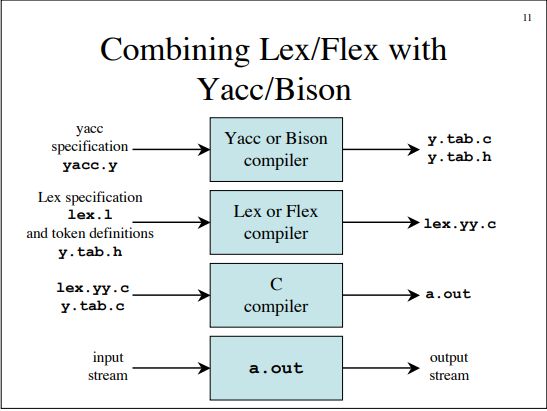

The figure above shows how Flex and Bison(Yacc) could be used when creating a pasrer tree. Lex is for the simple parts (e.g. numbers, names, operators) and Yacc for the more complex parts (e.g. expressions, statements).

In this example a calculator is being made that follows the rules of BODMAS( '* 'and '/' come before '-' and '+')

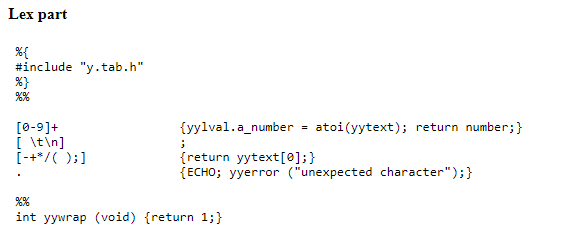

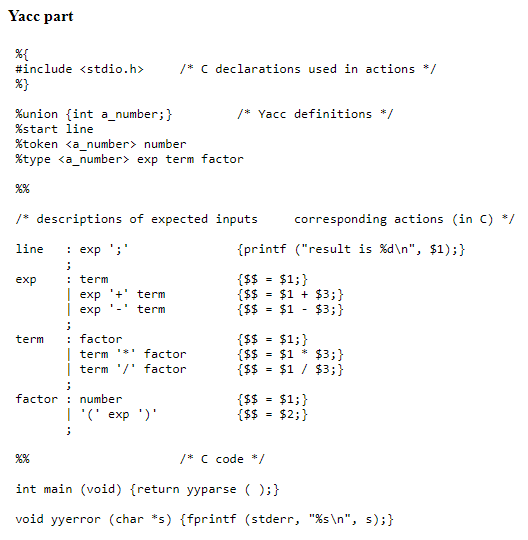

# Code Explanation(Yacc and Flex)









# Input Descriptions 

Gives the format of the grammar rules for yacc

name    : names and 'single character's
        | alternatives
        ;

# Yacc Definitions


* **%start** means the whole input should match line
* **%union**	lists all possible types for values associated with parts of the grammar and gives each a field-name
* **%type**	gives an individual type for the values associated with each part of the grammar,
 	using the field-names from the %union declaration
* **%token**	declare each grammar rule used by YACC that is recognised by LEX and give type of value

# Actions, C, Declaration and Code 

* **$$**	gives the resulting value for any part of the grammar
* **$1**, **$2**, etc.	values from sub-parts of the grammar
* **yyparse**	routine created by YACC from (expected input, action) lists.
 	(It actually returns a value indicating if it failed to recognise the input.)
* **yylex**	routine called by yyparse for all its input.
 	We are using getchar, which just reads characters from the input.
* **yyerror**	routine called by yyparse whenever it detects an error in its input.
* **y.tab.h**	gives LEX the names and type declarations etc. from YACC
* **yylval**	name used for values set in LEX e.g.
    *	yylval.a_number = atoi (yytext);
    * yylval.a_name = findname (yytext);


*How is flex and Yacc used together?* 

1. flex : calcl.l $\rightarrow$ calcl.c
2. gcc : calcl.c $\rightarrow$ calcl.o
3. byacc : calcy.y $\rightarrow$ calcy.c
4. gcc : calcy.c $\rightarrow$ calcy.o
5. ld : calcl.o calcy.o $\rightarrow$ calc

This shows the process of how we run the codes provided above.


# Precedence and Associativity 

Parsers that evaluate expressions usually have to establish the order in which various operations are carried out. For example, parsers for arithmetic expressions usually carry out multiplications before additions. Two factors affect order of operation:
* **Precedence** dictates which of two different operations is to be carried out first. For example **Z+X*B**. Operations that are to be carried out first are said to have a higher precedence than operations that are to be performed later.
* **Associativity** indicates which of two similar operations is to be carried out first. By similar, we mean operations with the same precedence (for example, addition and subtraction in C). For example, C chooses to parse. For example **B-C-X** could be done it two ways 
   * **(B-C)-X**. This is left associative
   * **B-(C-X)**. This is right associative 




***Declaration of Associativity***

You can declare the precedence and associativity of operator tokens in the declarations section by using the keywords:
* %left
* %right
* %nonassoc

For example:
**%left '+' '-'** indicates that the + and - operations have the same precedence and are left associative.


Associativity declarations should be given in order of precedence. Operations with lowest precedence are listed first, and those with highest precedence are listed last. Operations with equal precedence are listed on the same line. For example,

%right '='

%left  '+' '-'

%left  '*' '/' '%'

It says that **=** has a lower precedence than + and -, which in turn have a lower precedence than *, /, and %. = is also right associative, so that  A = B = C is parsed as A = (B = C)

*So how do we achieve the concept of "BODMAS"(Associativty and Precedence) in our yacc code?*

The example calculator above gives different precedence to the operators +, -, *, /, ( and ) by using a separate grammar rule for each precedence level. The operator associativities are also defined by the grammar rules. 

The problem that arises is that we tend to constrain the language design but Yacc has an alternative mechanism that decouples the declarations of precedence and associativity from the grammar, using **"%left", "%right" and "%nonassoc"**. 

Because of the way yacc specifies precedence and associativity, operators with equal precedence always have the same associativity. 


The code above using **"%left", "%right" and "%nonassoc"**. 

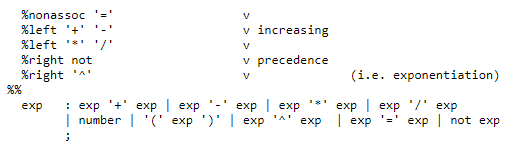